Krystal Education Platform
Certificate in Junior Python Data Analytics
Assignment – Pandas and Visual
Question 1
(a)	Import a CSV file expectancy.csv as a Pandas DataFrame regarding Hong Kong life expectancy as follow:
 
(b)	Create a expectancy scatter plot with OLS line using matplotlib.pyplot as follow:
(Hint: use numpy polyfit to get the intercept and slope)
 
(c)	What is life expectancy in year 2025? Show your formula in notebook.
 
(d)	Create a similar expectancy scatter plot using Seaborn as follow:
 
(e)	Create a similar expectancy scatter plot using plotly.express as follow:
 
(f)	Hold over on the Plotly OLS line and discover the insight comparing to your answer intercept and slope in part (b). What did you find?
(g)	What does the R squared (R2) mean to the regression line? What does it mean to the model?


In [1]:
import pandas as pd
path="C:/Users/User/Desktop/project 1/VS/data_folder/" # please enter your working directory path here
file_name="API_SP.DYN.LE00.IN_DS2_en_csv_v2_5795729.csv"
df = pd.read_csv(f"{path}{file_name}")
print(df)
print('display.max_rows: ',pd.options.display.max_rows)
pd.options.display.max_rows = 9999

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                              Indicator Name  Indicator Code       1960  \
0    Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.152000   
1    Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.085552   
2    Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.535000   
3    Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.845152   
4    Life expectancy at birth, total

In [2]:
import pandas as pd # a
import numpy as np
df=pd.DataFrame(df)

df1=df['Country Name']
df_T=df.T


HKG = df.loc[df['Country Code'] == "HKG"]

# for index in range(len(HKG)): 
#     if HKG.loc[index,'Country Name'] == 'HKG':
#         HKG=HKG.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])

# def drop (x):
#     x=x.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])
#     return x
# HKG = drop(HKG)


HKG = HKG.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)



HKG = HKG.T
# HKG.rename(columns={ HKG.columns[0]: "1" }, inplace = True)
year = pd.Series(HKG.index,index=HKG.index,dtype=int)
year=year.to_frame(name='Year')
# year=pd.Index([HKG])

HKG.rename(columns={ HKG.columns[0]: "Age" }, inplace = True)
age = HKG
df = pd.concat([year,age],axis=1)
df.drop(['2021','2022'], inplace = True)
df.reset_index(inplace=True, drop=True)


In [3]:
# import seaborn as sns
# sns.relplot(
#     data=df
# )

In [4]:
print(df['Year'].dtypes)
print(df['Age'].dtypes)
df['Year']

int32
float64


0     1960
1     1961
2     1962
3     1963
4     1964
5     1965
6     1966
7     1967
8     1968
9     1969
10    1970
11    1971
12    1972
13    1973
14    1974
15    1975
16    1976
17    1977
18    1978
19    1979
20    1980
21    1981
22    1982
23    1983
24    1984
25    1985
26    1986
27    1987
28    1988
29    1989
30    1990
31    1991
32    1992
33    1993
34    1994
35    1995
36    1996
37    1997
38    1998
39    1999
40    2000
41    2001
42    2002
43    2003
44    2004
45    2005
46    2006
47    2007
48    2008
49    2009
50    2010
51    2011
52    2012
53    2013
54    2014
55    2015
56    2016
57    2017
58    2018
59    2019
60    2020
Name: Year, dtype: int32

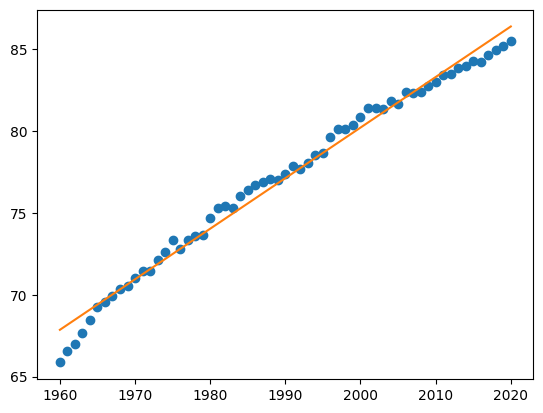

y= 0.30887763990111033 x+ -537.5382003245212


In [5]:
import matplotlib.pyplot as plt # b
x=df['Year']
y=df['Age']
parameter = np.polyfit(x,y,1)
y2 = parameter[0] * x + parameter[1]
plt.scatter(x,y)
plt.plot(x,y2,color='C1')
plt.show()
print('y=',parameter[0],'x+',parameter[1])

In [6]:
import numpy as np # c
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
future_2025 = 5
def future(df, future):
    df['Prediction'] = df[['Age']].shift(-future)
    X = np.array(df.drop(['Prediction'],axis=1))[:-future]
    y = np.array(df['Prediction'])[:-future]
    
    i=future
    df['Year'] = df[['Year']].shift(-i).ffill()
    while i > 0:
        df.iloc[-i, df.columns.get_loc('Year')]=df.iloc[-i-1, df.columns.get_loc('Year')]+1
        i-=1
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    
    df.fillna(valid,inplace=True)
    # pd.concat([df['Prediction'],valid['Prediction']],ignore_index=False,axis=0)
    
    plt.figure(figsize=(16,8))
    plt.title('life expectancy in year 2025')
    plt.xlabel("Year")
    plt.ylabel('Age')
    plt.plot(df['Age'])
    plt.plot(valid[['Age','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    plt.show()

    


C:\Users\User\AppData\Local\Temp\ipykernel_13564\4094548658.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = tree_prediction


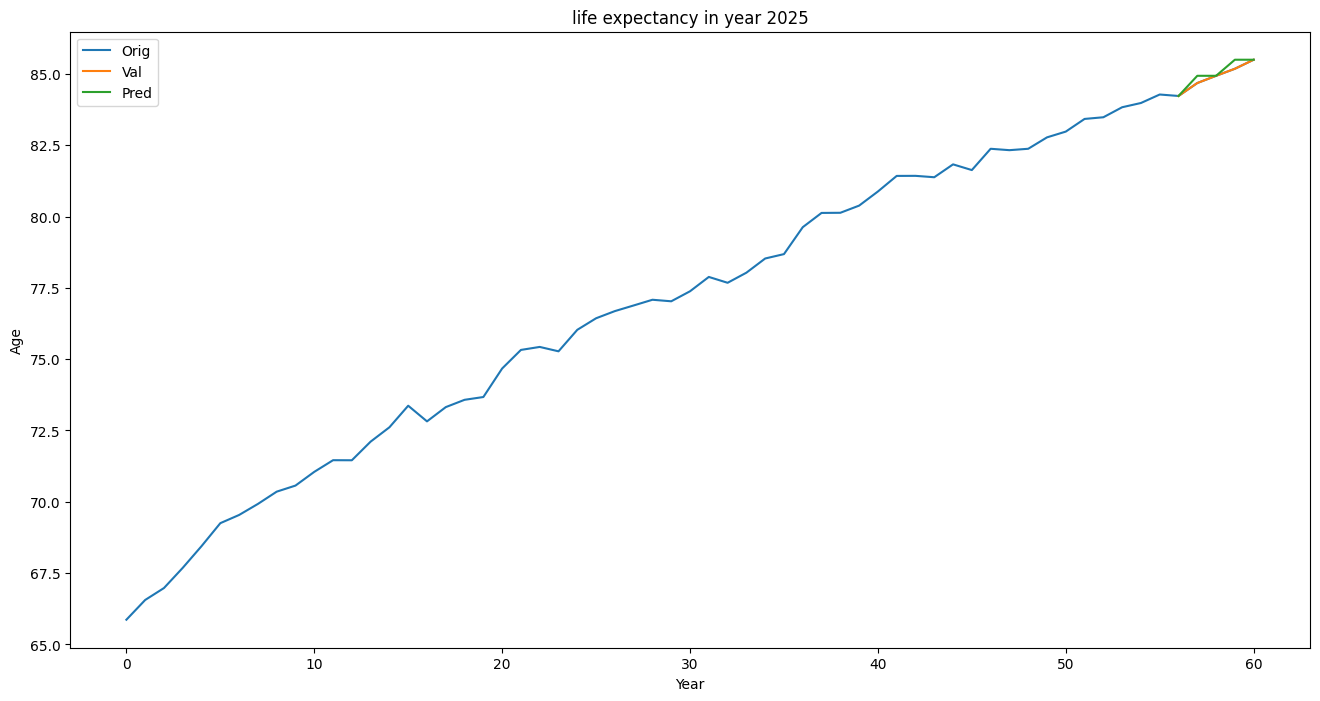

      Year        Age  Prediction
0   1965.0  65.866293   69.251220
1   1966.0  66.558878   69.538878
2   1967.0  66.977171   69.925439
3   1968.0  67.685732   70.355829
4   1969.0  68.446098   70.568561
5   1970.0  69.251220   71.049951
6   1971.0  69.538878   71.458537
7   1972.0  69.925439   71.456098
8   1973.0  70.355829   72.109756
9   1974.0  70.568561   72.612195
10  1975.0  71.049951   73.368293
11  1976.0  71.458537   72.819512
12  1977.0  71.456098   73.319512
13  1978.0  72.109756   73.575610
14  1979.0  72.612195   73.673171
15  1980.0  73.368293   74.673171
16  1981.0  72.819512   75.324390
17  1982.0  73.319512   75.429268
18  1983.0  73.575610   75.275610
19  1984.0  73.673171   76.029268
20  1985.0  74.673171   76.434146
21  1986.0  75.324390   76.685366
22  1987.0  75.429268   76.882927
23  1988.0  75.275610   77.082927
24  1989.0  76.029268   77.029268
25  1990.0  76.434146   77.380488
26  1991.0  76.685366   77.882927
27  1992.0  76.882927   77.678049
28  1993.0  77

In [7]:
future(df, future_2025)
print(df)

<Axes: xlabel='Year', ylabel='Age'>

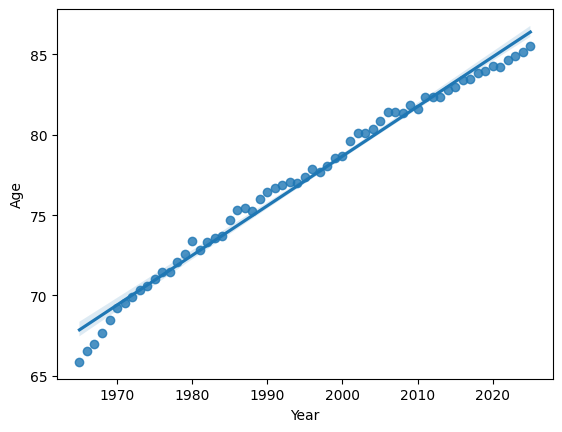

In [8]:
import seaborn as sns
sns.regplot(data=df,x=df['Year'],y=df['Age']) # d

In [9]:
import plotly.express as px # e

df = df
fig = px.scatter(df, x="Year", y="Age", trendline="ols")
fig.show()

In [10]:
# f 
# It was founded that the values of the slope in part (e) is the same as the slope in part (b)

In [11]:
# g
# A trendline is most reliable when its R-squared value is at or near 1.  
# Which means that if the R-squared value is closer to 1, the line is fit better to the data.
# It also means that the data distrubution is lesser.



                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                          Africa Eastern and Southern          AFE   
2                                          Afghanistan          AFG   
3                           Africa Western and Central          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                           Arab World          ARB   
8                                 United Arab Emirates          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                      American Samoa          ASM   
12                                 Antigua and Barbuda          ATG   
13    

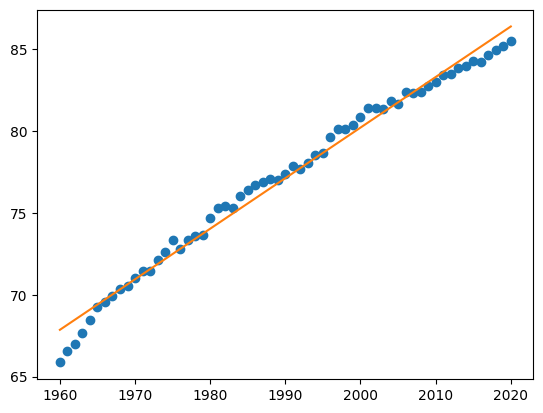

y= 0.30887763990111033 x+ -537.5382003245212


In [12]:
import pandas as pd
path="C:/Users/User/Desktop/project 1/VS/data_folder/" # please enter your working directory path here
file_name="API_SP.DYN.LE00.IN_DS2_en_csv_v2_5795729.csv"
df = pd.read_csv(f"{path}{file_name}")
print(df)
print('display.max_rows: ',pd.options.display.max_rows)
pd.options.display.max_rows = 9999

# Answer of question A
import pandas as pd 
import numpy as np
df=pd.DataFrame(df)
df1=df['Country Name']
df_T=df.T
HKG = df.loc[df['Country Code'] == "HKG"]
HKG = HKG.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)
HKG = HKG.T
year = pd.Series(HKG.index,index=HKG.index,dtype=int)
year=year.to_frame(name='Year')
HKG.rename(columns={ HKG.columns[0]: "Age" }, inplace = True)
age = HKG
df = pd.concat([year,age],axis=1)
df.drop(['2021','2022'], inplace = True)
df.reset_index(inplace=True, drop=True)

# Answer of question B
import matplotlib.pyplot as plt
x=df['Year']
y=df['Age']
parameter = np.polyfit(x,y,1)
y2 = parameter[0] * x + parameter[1]
plt.scatter(x,y)
plt.plot(x,y2,color='C1')
plt.show()
print('y=',parameter[0],'x+',parameter[1])

https://www.pythonguis.com/tutorials/plotting-matplotlib/

In [13]:
import matplotlib
matplotlib.rcsetup.interactive_bk

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo']

# Submition

Answer of Question A is: 
     Year        Age
0   1960  65.866293
1   1961  66.558878
2   1962  66.977171
3   1963  67.685732
4   1964  68.446098
5   1965  69.251220
6   1966  69.538878
7   1967  69.925439
8   1968  70.355829
9   1969  70.568561
10  1970  71.049951
11  1971  71.458537
12  1972  71.456098
13  1973  72.109756
14  1974  72.612195
15  1975  73.368293
16  1976  72.819512
17  1977  73.319512
18  1978  73.575610
19  1979  73.673171
20  1980  74.673171
21  1981  75.324390
22  1982  75.429268
23  1983  75.275610
24  1984  76.029268
25  1985  76.434146
26  1986  76.685366
27  1987  76.882927
28  1988  77.082927
29  1989  77.029268
30  1990  77.380488
31  1991  77.882927
32  1992  77.678049
33  1993  78.031707
34  1994  78.529268
35  1995  78.682927
36  1996  79.626829
37  1997  80.126829
38  1998  80.131707
39  1999  80.382927
40  2000  80.878049
41  2001  81.424390
42  2002  81.426829
43  2003  81.378049
44  2004  81.829268
45  2005  81.629268
46  2006  82.375610
47  2007  82.

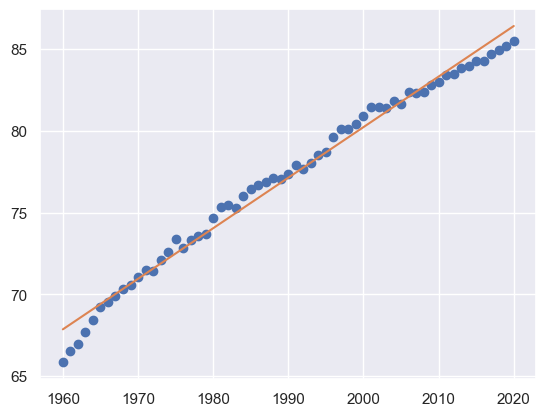

Answer of Question B is: 
 y=  0.30887763990111033 x+ -537.5382003245212


C:\Users\User\AppData\Local\Temp\ipykernel_35056\3690010484.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



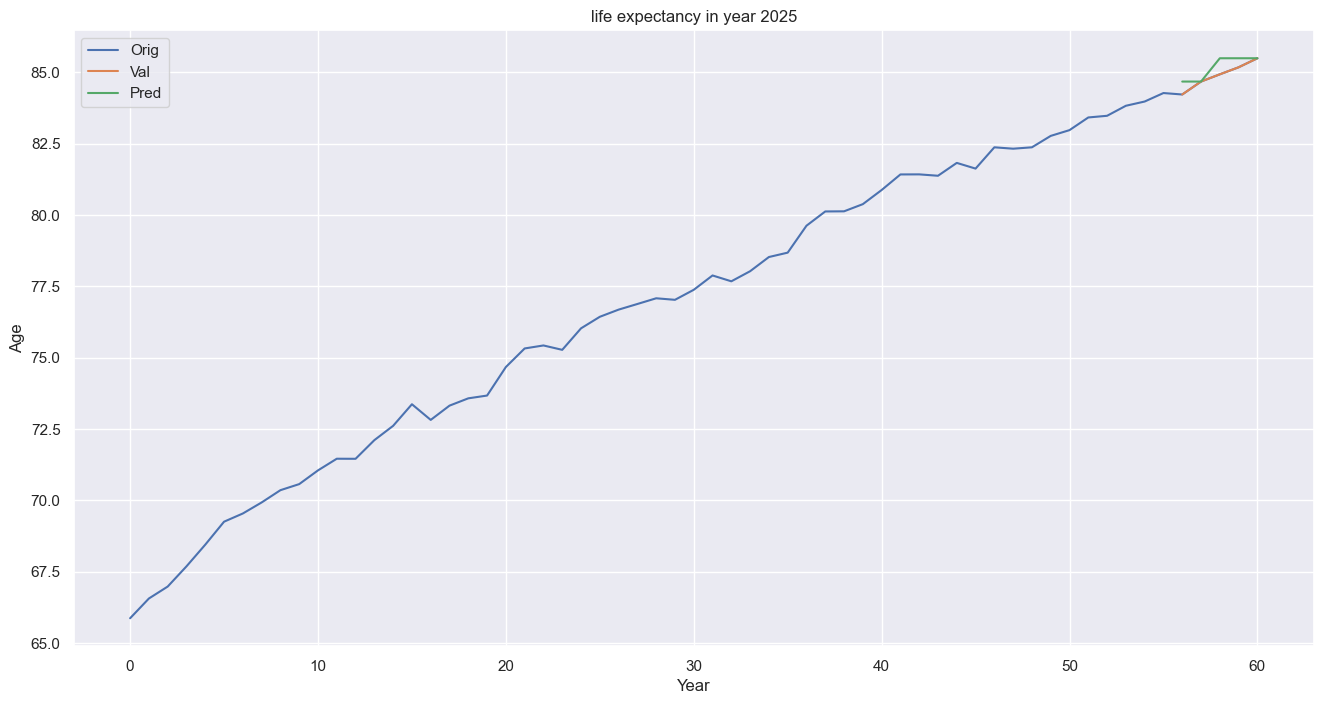

Answer of Question C is: 
       Year        Age  Prediction
0   1965.0  65.866293   69.251220
1   1966.0  66.558878   69.538878
2   1967.0  66.977171   69.925439
3   1968.0  67.685732   70.355829
4   1969.0  68.446098   70.568561
5   1970.0  69.251220   71.049951
6   1971.0  69.538878   71.458537
7   1972.0  69.925439   71.456098
8   1973.0  70.355829   72.109756
9   1974.0  70.568561   72.612195
10  1975.0  71.049951   73.368293
11  1976.0  71.458537   72.819512
12  1977.0  71.456098   73.319512
13  1978.0  72.109756   73.575610
14  1979.0  72.612195   73.673171
15  1980.0  73.368293   74.673171
16  1981.0  72.819512   75.324390
17  1982.0  73.319512   75.429268
18  1983.0  73.575610   75.275610
19  1984.0  73.673171   76.029268
20  1985.0  74.673171   76.434146
21  1986.0  75.324390   76.685366
22  1987.0  75.429268   76.882927
23  1988.0  75.275610   77.082927
24  1989.0  76.029268   77.029268
25  1990.0  76.434146   77.380488
26  1991.0  76.685366   77.882927
27  1992.0  76.882927

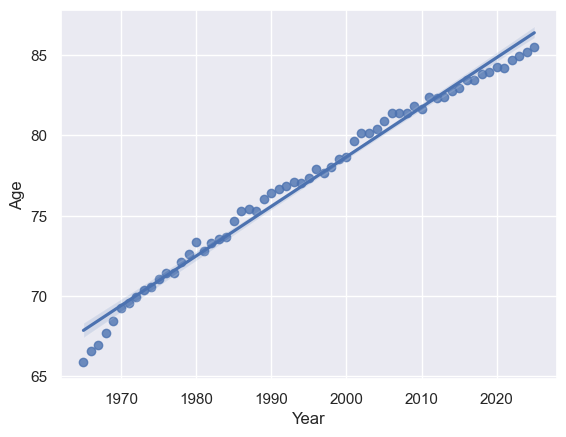

Answer of Question E is: 



Answer of Question F : 

  It was founded that the values of the slope in part (e) is the same as the slope in part (b) 

Answer of Question G : 

 A trendline is most reliable when its R-squared value is at or near 1. 
 Which means that if the R-squared value is closer to 1, the line is fit better to the data. 
 It also means that the data distrubution is lesser.


In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
# from matplotlib import interactive
# import wx
# import sys
# import matplotlib
# matplotlib.use('WXAgg') # pip install PyQt5
import plotly.graph_objects as go
# from PyQt5 import QtCore, QtWidgets
# from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg
# from matplotlib.figure import Figure
# matplotlib.use('module://ipykernel.pylab.backend_inline')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# Answer of Question A
df = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_5795729.csv')
pd.options.display.max_rows = 9999
df=pd.DataFrame(df)
df1=df['Country Name']
df_T=df.T
HKG = df.loc[df['Country Code'] == "HKG"]
HKG = HKG.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)
HKG = HKG.T
year = pd.Series(HKG.index,index=HKG.index,dtype=int)
year=year.to_frame(name='Year')
HKG.rename(columns={ HKG.columns[0]: "Age" }, inplace = True)
age = HKG
df = pd.concat([year,age],axis=1)
df.drop(['2021','2022'], inplace = True)
df.reset_index(inplace=True, drop=True)
print('Answer of Question A is: \n', df)
# Answer of Question B
x=df['Year']
y=df['Age']
parameter = np.polyfit(x,y,1)
y2 = parameter[0] * x + parameter[1]
plt.scatter(x,y)
plt.plot(x,y2,color='C1')
plt.show()
print('Answer of Question B is: \n y= ',parameter[0],'x+',parameter[1])
# Answer of Question C
df_for_question_C = df
future_2025 = 5
def future(df, future):
    df['Prediction'] = df[['Age']].shift(-future)
    X = np.array(df.drop(['Prediction'],axis=1))[:-future]
    y = np.array(df['Prediction'])[:-future]
    i=future
    df['Year'] = df[['Year']].shift(-i).ffill()
    while i > 0:
        df.iloc[-i, df.columns.get_loc('Year')]=df.iloc[-i-1, df.columns.get_loc('Year')]+1
        i-=1
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)
    plt.figure(figsize=(16,8))
    plt.title('life expectancy in year 2025')
    plt.xlabel("Year")
    plt.ylabel('Age')
    plt.plot(df['Age'])
    plt.plot(valid[['Age','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    plt.show()
future(df_for_question_C, future_2025)
print('Answer of Question C is: \n', df_for_question_C, '\n')

# Answer of Question D
print('Answer of Question D is: \n')
figd,axd = plt.subplots()
sns.set()
sns.regplot(data=df,x=df['Year'],y=df['Age'],ax=axd)
plt.show()
# Answer of Question E
print('Answer of Question E is: \n')
fige = go.Figure(px.scatter(df, x="Year", y="Age", trendline="ols"))
fige.show()
# Answer of Question F
print('Answer of Question F : \n\n ',
      'It was founded that the values of the slope in part (e) is the same as the slope in part (b) \n')
# It was founded that the values of the slope in part (e) is the same as the slope in part (b)
# Answer of Question G
print('Answer of Question G : \n\n A trendline is most reliable when its R-squared value is at or near 1. \n',  
      'Which means that if the R-squared value is closer to 1, the line is fit better to the data. \n'  ,
      'It also means that the data distrubution is lesser.')
# A trendline is most reliable when its R-squared value is at or near 1.  
# Which means that if the R-squared value is closer to 1, the line is fit better to the data.
# It also means that the data distrubution is lesser.

Answer of Question A is: 
     Year        Age
0   1960  65.866293
1   1961  66.558878
2   1962  66.977171
3   1963  67.685732
4   1964  68.446098
5   1965  69.251220
6   1966  69.538878
7   1967  69.925439
8   1968  70.355829
9   1969  70.568561
10  1970  71.049951
11  1971  71.458537
12  1972  71.456098
13  1973  72.109756
14  1974  72.612195
15  1975  73.368293
16  1976  72.819512
17  1977  73.319512
18  1978  73.575610
19  1979  73.673171
20  1980  74.673171
21  1981  75.324390
22  1982  75.429268
23  1983  75.275610
24  1984  76.029268
25  1985  76.434146
26  1986  76.685366
27  1987  76.882927
28  1988  77.082927
29  1989  77.029268
30  1990  77.380488
31  1991  77.882927
32  1992  77.678049
33  1993  78.031707
34  1994  78.529268
35  1995  78.682927
36  1996  79.626829
37  1997  80.126829
38  1998  80.131707
39  1999  80.382927
40  2000  80.878049
41  2001  81.424390
42  2002  81.426829
43  2003  81.378049
44  2004  81.829268
45  2005  81.629268
46  2006  82.375610
47  2007  82.

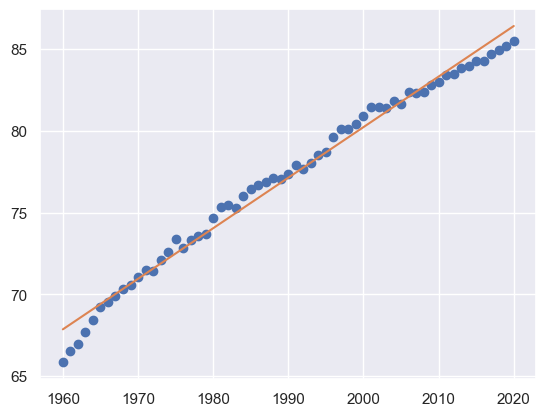

Answer of Question B is: 
 y=  0.30887763990111033 x+ -537.5382003245212


C:\Users\User\AppData\Local\Temp\ipykernel_16468\49792329.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



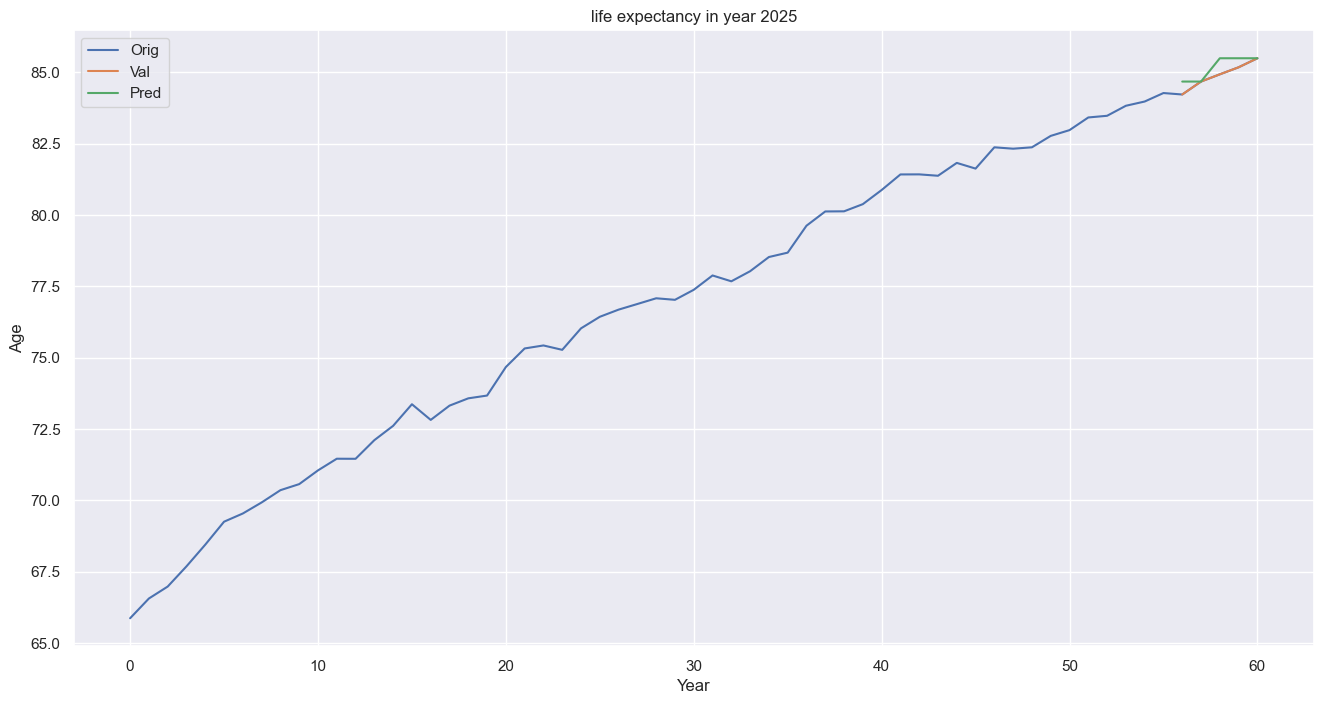

Answer of Question C is: 
       Year        Age  Prediction
56  2021.0  84.226829   84.680488
57  2022.0  84.680488   84.680488
58  2023.0  84.934146   85.497561
59  2024.0  85.180488   85.497561
60  2025.0  85.497561   85.497561 

Answer of Question D is: 



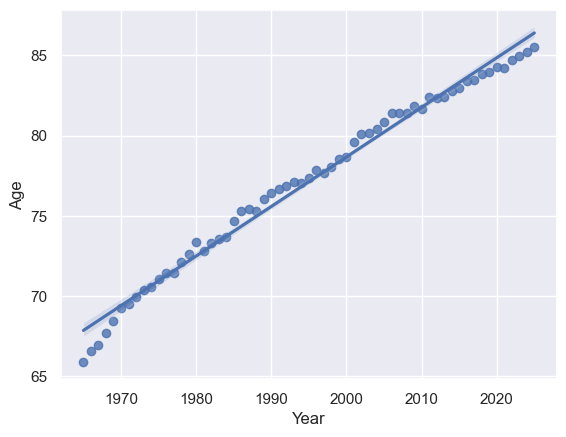

Answer of Question E is: 



Answer of Question F : 

  It was founded that the values of the slope in part (e) is the same as the slope in part (b) 

Answer of Question G : 

 A trendline is most reliable when its R-squared value is at or near 1. 
 Which means that if the R-squared value is closer to 1, the line is fit better to the data. 
 It also means that the data distrubution is lesser.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# Answer of Question A
df = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_5795729.csv')
pd.options.display.max_rows = 9999
df=pd.DataFrame(df)
df1=df['Country Name']
df_T=df.T
HKG = df.loc[df['Country Code'] == "HKG"]
HKG = HKG.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)
HKG = HKG.T
year = pd.Series(HKG.index,index=HKG.index,dtype=int)
year=year.to_frame(name='Year')
HKG.rename(columns={ HKG.columns[0]: "Age" }, inplace = True)
age = HKG
df = pd.concat([year,age],axis=1)
df.drop(['2021','2022'], inplace = True)
df.reset_index(inplace=True, drop=True)
print('Answer of Question A is: \n', df)
# Answer of Question B
x=df['Year']
y=df['Age']
parameter = np.polyfit(x,y,1)
y2 = parameter[0] * x + parameter[1]
plt.scatter(x,y)
plt.plot(x,y2,color='C1')
plt.show()
print('Answer of Question B is: \n y= ',parameter[0],'x+',parameter[1])
# Answer of Question C
df_for_question_C = df
future_2025 = 5
def future(df, future):
    df['Prediction'] = df[['Age']].shift(-future)
    X = np.array(df.drop(['Prediction'],axis=1))[:-future]
    y = np.array(df['Prediction'])[:-future]
    i=future
    df['Year'] = df[['Year']].shift(-i).ffill()
    while i > 0:
        df.iloc[-i, df.columns.get_loc('Year')]=df.iloc[-i-1, df.columns.get_loc('Year')]+1
        i-=1
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)
    plt.figure(figsize=(16,8))
    plt.title('life expectancy in year 2025')
    plt.xlabel("Year")
    plt.ylabel('Age')
    plt.plot(df['Age'])
    plt.plot(valid[['Age','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    plt.show()
future(df_for_question_C, future_2025)
print('Answer of Question C is: \n', df_for_question_C.tail(5), '\n')

# Answer of Question D
print('Answer of Question D is: \n')
figd,axd = plt.subplots()
sns.set()
sns.regplot(data=df,x=df['Year'],y=df['Age'],ax=axd)
plt.show()
# Answer of Question E
print('Answer of Question E is: \n')
fige = go.Figure(px.scatter(df, x="Year", y="Age", trendline="ols"))
fige.show()
# Answer of Question F
print('Answer of Question F : \n\n ',
      'It was founded that the values of the slope in part (e) is the same as the slope in part (b) \n')
# Answer of Question G
print('Answer of Question G : \n\n A trendline is most reliable when its R-squared value is at or near 1. \n',  
      'Which means that if the R-squared value is closer to 1, the line is fit better to the data. \n'  ,
      'It also means that the data distrubution is lesser.')